In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
from matplotlib import patches

from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
import fiftyone as fo
import fiftyone.zoo as foz
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt
from matplotlib import patches
import torch
from dataset import COCODataset, collate_padding_fn
from torch.utils.data import DataLoader, Dataset
import numpy as np
import random

In [2]:
def seed_all(seed):
    print("[ Using Seed : ", seed, " ]")

    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [3]:
seed_all(42)

dset = COCODataset(
    dataset_name='coco-2017-validation',
    split='validation', 
    max_num_detection=10,
    evaluation=True,
    keep_original=True,
    crop_size=400)

[ Using Seed :  42  ]
Found annotations at '/mnt/tcqian/fiftyone/coco-2017/raw/instances_val2017.json'
Images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Loaded split validation with 3802 images.


In [4]:
def draw_img(ax, img, boxes=None, gt_boxes=None):
    img = torch.permute(img, [1, 2, 0])
    
    ax.xaxis.tick_top()
    ax.imshow(img)
    
    if boxes is not None:
        for box in boxes:
            x, y, w, h = box
            x -= 0.5 * w
            y -= 0.5 * h
            x *= img.shape[1]
            y *= img.shape[0]
            w *= img.shape[1]
            h *= img.shape[0]
            ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, edgecolor='red', lw=2))
        
    if gt_boxes is not None:
        for box in gt_boxes:
            x, y, w, h = box
            x -= 0.5 * w
            y -= 0.5 * h
            x *= img.shape[1]
            y *= img.shape[0]
            w *= img.shape[1]
            h *= img.shape[0]
            ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, edgecolor='green', lw=2))

In [5]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
batch_size = 8    
dataloader = DataLoader(dset, batch_size=batch_size, shuffle=False, 
                        collate_fn=collate_padding_fn, 
                       num_workers=1,
                       worker_init_fn=seed_worker)

In [6]:
backbone = resnet_fpn_backbone('resnet50', pretrained = True, norm_layer = None, trainable_layers = 5)

/mnt/tcqian/env/lib/python3.7/site-packages/torchvision/models/_utils.py:136: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/mnt/tcqian/env/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/mnt/tcqian/env/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to

torch.Size([1, 3, 400, 400])
torch.Size([1, 256, 7, 7])
torch.Size([1, 3, 400, 400])
torch.Size([1, 256, 7, 7])
torch.Size([1, 3, 400, 400])
torch.Size([1, 256, 7, 7])
torch.Size([1, 3, 400, 400])
torch.Size([1, 256, 7, 7])
torch.Size([1, 3, 400, 400])
torch.Size([1, 256, 7, 7])
torch.Size([1, 3, 400, 400])
torch.Size([1, 256, 7, 7])
torch.Size([1, 3, 400, 400])
torch.Size([1, 256, 7, 7])
torch.Size([1, 3, 400, 400])
torch.Size([1, 256, 7, 7])


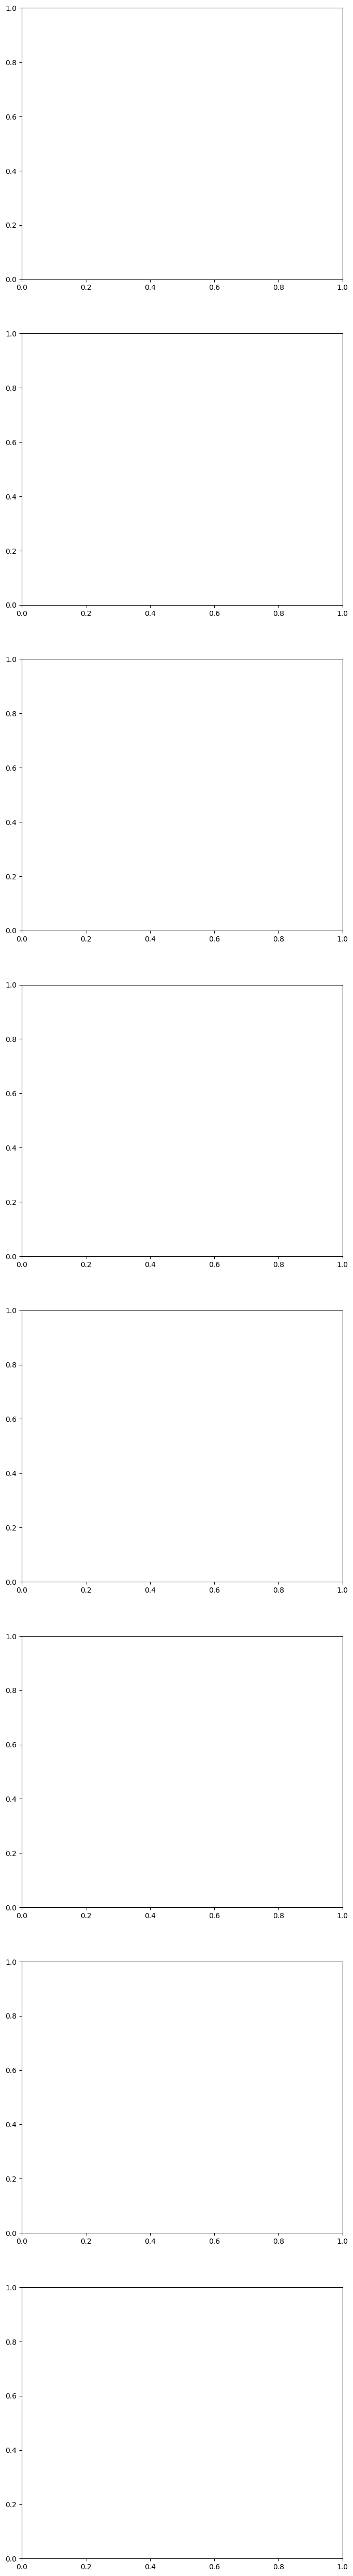

In [12]:
fig, ax = plt.subplots(batch_size, 1, squeeze=False)
fig.set_size_inches((8, 8*batch_size))
for batch_idx, data in enumerate(dataloader):
    batch_img = data['img_ori'] / 255.0
    for i in range(batch_size):
        img = batch_img[i]
        print(img.unsqueeze(0).shape)
        x = backbone(img.unsqueeze(0))
        print(x['pool'].shape)
        # draw_img(ax[i, 0], img)
    break